<a href="https://colab.research.google.com/github/aSafarpoor/Traffic-Sign-Detection-DIPFinalProject-/blob/main/blurdeblur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt
import os
from tqdm import tqdm
from scipy.ndimage import convolve
import seaborn as sns
import pandas as pd

In [ ]:
!wget https://github.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/blob/main/trafficimage/00000.ppm?raw=true
!wget https://github.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/blob/main/trafficimage/00001.ppm?raw=true
!wget https://github.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/blob/main/trafficimage/00002.ppm?raw=true
!wget https://github.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/blob/main/trafficimage/00003.ppm?raw=true
!wget https://github.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/blob/main/trafficimage/00004.ppm?raw=true
!wget https://github.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/blob/main/trafficimage/00005.ppm?raw=true
!wget https://github.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/blob/main/trafficimage/00006.ppm?raw=true
!wget https://github.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/blob/main/trafficimage/00007.ppm?raw=true
!wget https://github.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/blob/main/trafficimage/00008.ppm?raw=true
!wget https://github.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/blob/main/trafficimage/00009.ppm?raw=true
!wget https://github.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/blob/main/trafficimage/00010.ppm?raw=true

00000.ppm?raw=true
00001.ppm?raw=true
00002.ppm?raw=true
00003.ppm?raw=true
00004.ppm?raw=true
00005.ppm?raw=true
00006.ppm?raw=true
00007.ppm?raw=true
00008.ppm?raw=true
00009.ppm?raw=true
00010.ppm?raw=true


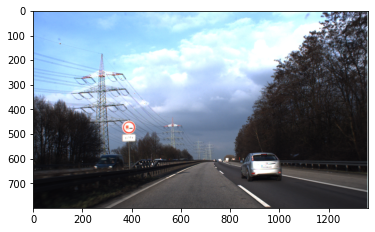

In [30]:
imnames = []
for i in range(10):
    imnames.append('0000'+str(i)+'.ppm?raw=true')
imnames.append('00010.ppm?raw=true')

ims = []
for i in imnames:
    print(i)
    im = cv2.imread(i)
    im = cv2.cvtColor(im, cv2.COLOR_RGB2BGR) #just for showing images, not necessary in real porposes:)
    ims.append(im)

plt.imshow(ims[3]);plt.show()




In [41]:
for i in range(11):
    x0 = int(cv2.Laplacian(ims[i][:,:,0], cv2.CV_64F).var())
    x1 = int(cv2.Laplacian(ims[i][:,:,1], cv2.CV_64F).var())
    x2 = int(cv2.Laplacian(ims[i][:,:,2], cv2.CV_64F).var())
    print(
        int((x0+x1+x2)/3), 
          int(cv2.Laplacian(ims[i], cv2.CV_64F).var())
        )

293 294
528 529
294 294
479 479
284 284
426 427
473 474
1473 1473
1150 1151
1501 1501
482 482


In [42]:
int(cv2.Laplacian(ims[i], cv2.CV_64F).var()) ### loss computation

482

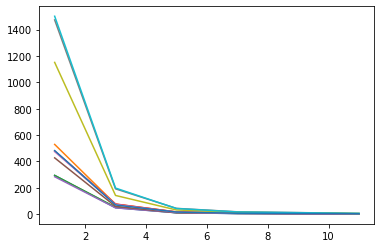

In [46]:
for im1 in ims:
    y = []

    k3 = np.ones((3,3))/9
    k5 = np.ones((5,5))/25
    k7 = np.ones((7,7))/49
    k11 = np.ones((11,11))/121
    im3 = cv2.filter2D(src=im1, ddepth=-1, kernel=k3)
    im5 = cv2.filter2D(src=im1, ddepth=-1, kernel=k5)
    im7 = cv2.filter2D(src=im1, ddepth=-1, kernel=k7)
    im11 = cv2.filter2D(src=im1, ddepth=-1, kernel=k11)

    y.append(int(cv2.Laplacian(im1, cv2.CV_64F).var()))
    y.append(int(cv2.Laplacian(im3, cv2.CV_64F).var()))
    y.append(int(cv2.Laplacian(im5, cv2.CV_64F).var()))
    y.append(int(cv2.Laplacian(im7, cv2.CV_64F).var()))
    y.append(int(cv2.Laplacian(im11, cv2.CV_64F).var()))

    plt.plot([1,3,5,7,11],y)
    
plt.show()

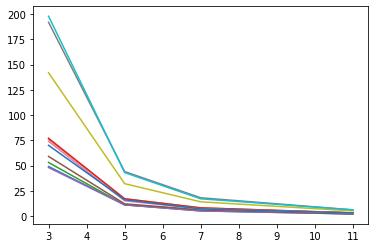

In [45]:
for im1 in ims:
    y = []

    k3 = np.ones((3,3))/9
    k5 = np.ones((5,5))/25
    k7 = np.ones((7,7))/49
    k11 = np.ones((11,11))/121
    im3 = cv2.filter2D(src=im1, ddepth=-1, kernel=k3)
    im5 = cv2.filter2D(src=im1, ddepth=-1, kernel=k5)
    im7 = cv2.filter2D(src=im1, ddepth=-1, kernel=k7)
    im11 = cv2.filter2D(src=im1, ddepth=-1, kernel=k11)

    y.append(int(cv2.Laplacian(im1, cv2.CV_64F).var()))
    y.append(int(cv2.Laplacian(im3, cv2.CV_64F).var()))
    y.append(int(cv2.Laplacian(im5, cv2.CV_64F).var()))
    y.append(int(cv2.Laplacian(im7, cv2.CV_64F).var()))
    y.append(int(cv2.Laplacian(im11, cv2.CV_64F).var()))

    plt.plot([3,5,7,11],y[1:])
    
plt.show()

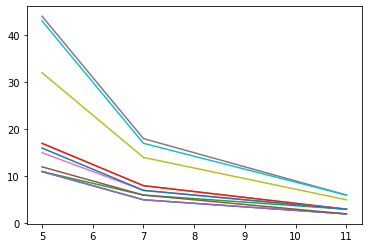

In [47]:
for im1 in ims:
    y = []

    k3 = np.ones((3,3))/9
    k5 = np.ones((5,5))/25
    k7 = np.ones((7,7))/49
    k11 = np.ones((11,11))/121
    im3 = cv2.filter2D(src=im1, ddepth=-1, kernel=k3)
    im5 = cv2.filter2D(src=im1, ddepth=-1, kernel=k5)
    im7 = cv2.filter2D(src=im1, ddepth=-1, kernel=k7)
    im11 = cv2.filter2D(src=im1, ddepth=-1, kernel=k11)

    y.append(int(cv2.Laplacian(im1, cv2.CV_64F).var()))
    y.append(int(cv2.Laplacian(im3, cv2.CV_64F).var()))
    y.append(int(cv2.Laplacian(im5, cv2.CV_64F).var()))
    y.append(int(cv2.Laplacian(im7, cv2.CV_64F).var()))
    y.append(int(cv2.Laplacian(im11, cv2.CV_64F).var()))

    plt.plot([5,7,11],y[2:])
    
plt.show()

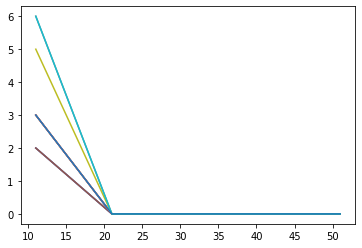

In [48]:
for im1 in ims:
    y = []

    k11 = np.ones((11,11))/121
    k21 = np.ones((21,21))/21*21
    k51 = np.ones((51,51))/51*51
    im11 = cv2.filter2D(src=im1, ddepth=-1, kernel=k11)
    im21 = cv2.filter2D(src=im1, ddepth=-1, kernel=k21)
    im51 = cv2.filter2D(src=im1, ddepth=-1, kernel=k51)

    y.append(int(cv2.Laplacian(im11, cv2.CV_64F).var()))
    y.append(int(cv2.Laplacian(im21, cv2.CV_64F).var()))
    y.append(int(cv2.Laplacian(im51, cv2.CV_64F).var()))

    plt.plot([11,21,51],y[:])
    
plt.show()

In [67]:
k1 = np.zeros((3,3))
k2 = np.zeros((3,3))
k1[1,:]=1
k2[:,1]=1
print(k1,'\n')
print(k2,'\n')
print(convolve(k1,k2))

[[0. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]] 

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]] 

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [68]:
k1 = np.zeros((5,5))
k2 = np.zeros((3,3))
k1[2,:]=1
k2[:,1]=1
print(k1,'\n')
print(k2,'\n')
print(convolve(k1,k2))

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]] 

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]] 

[[0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]


In [71]:
def create_kernel(l1=1,l2=1):
    k1 = np.zeros((l1,l1))
    k2 = np.zeros((l2,l2))
    k1[int(l1/2),:]=1
    k2[:,int(l2/2)]=1
    if l1>=l2:
        return convolve(k1,k2)
    else:
        return convolve(k2,k1)

In [72]:
print(create_kernel(1,1),'\n')
print(create_kernel(1,3),'\n')
print(create_kernel(3,3),'\n')
print(create_kernel(5,3),'\n')
print(create_kernel(3,5))

[[1.]] 

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]] 

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

[[0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]] 

[[0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0.]]


In [105]:
x = [1,2,3,5,7,11]
y = np.zeros((6,6))

for imin in tqdm(ims):
    ii = -1
    for i in x:
        ii += 1
        jj = -1
        for j in x:
            jj +=1
            kernel = create_kernel(i,j)
            imout = cv2.filter2D(src=imin, ddepth=-1, kernel=kernel)
            y[ii][jj] += round(cv2.Laplacian(imout, cv2.CV_64F).var(),2)

100%|██████████| 11/11 [00:15<00:00,  1.39s/it]


In [106]:
y = y/len(ims)

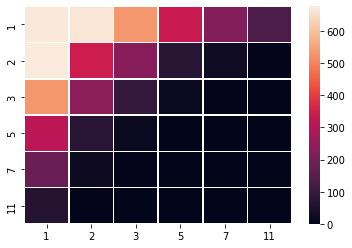

In [107]:
df_cm = pd.DataFrame(y, index = [str(i) for i in x],
                  columns = [str(i) for i in x])

ax = sns.heatmap(df_cm, linewidth=0.5, annot = False)
plt.show()

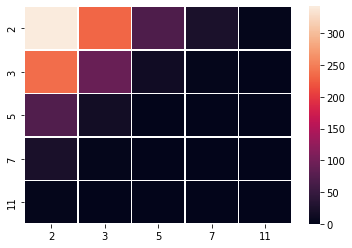

In [108]:
si , sj = 1,1
df_cm = pd.DataFrame(y[si:,sj:], index = [str(i) for i in x[si:]],
                  columns = [str(i) for i in x[sj:]])

ax = sns.heatmap(df_cm, linewidth=0.5, annot = False)
plt.show()

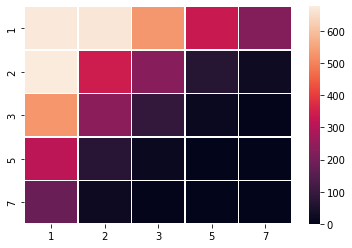

In [110]:
df_cm = pd.DataFrame(y[:5,:5], index = [str(i) for i in x[:5]],
                  columns = [str(i) for i in x[:5]])

ax = sns.heatmap(df_cm, linewidth=0.5, annot = False)
plt.show()

In [113]:
for i in range(5):
    print(x[i]," ----> ", y[i][i])

1  ---->  672.0099999999999
2  ---->  342.72636363636366
3  ---->  91.7890909090909
5  ---->  1.0781818181818181
7  ---->  0.0


In [114]:
ths = {670:1,340:2,91:3,1:5}
ths

{1: 5, 91: 3, 340: 2, 670: 1}